**Part A:**

**1. Describe the importance of training and test data. Why do we separate data into these subsets?**
* A: Training data is important because we use them to tune the model, and also find the optimized parameters. After the whole optimization, we put our test data into the model, which is unseen for the model to test the model performance for the new data. It is because, although the score from the training data will be high after our tuning, it might just be because the model performs well towards the data it has already seen. As a result, the score from the test data could represent the model's prediction accuracy.

**2. What is k-fold cross validation and what do we use it for?**
* A: The main idea of k-fold cross validation is to divide our training data into k segments. For each time, we use one of the segments as a test segment, while using the other k-1 segments as the training data. As a result, this process will be repeated k times. We can learn the average performance of k-fold validation by printing out the cross_val_score. Moreover, the reason we use k-fold validation is that we want to make sure the model can perform well and be stable in all kinds of segmentation of data. For instance, the model might get a high score in a specific segmentation, while gaining a bad score in another segmentation. As a result, the k-fold validation could help us to evaluate the model performance in general, minimizing bias and over-fitting.

**3. How is k-fold cross validation different from stratified k-fold cross validation?**
* A: The k-fold cross validation divides the training data into k segments without considering the distribution of the original data. However, StratifiedKFold can make sure that the distribution in each segment is the same as the original data.

**4. Name the 4 types of supervised learning models that we have learned thus far that are used to predict categorical dependent variables like whether an email is labeled “spam” or “not spam.”**
* A: Logistic Regression, Bagging Classification, Random Forest, and Support Vector Machines.

**5. Name the 3 types of supervised learning models that we have learned thus far that are used to predict continuous dependent variables like test scores.**
* A: Linear Regression, Lasso Regression, and Ridge Regression.

**Part B:**
1. Import the spam dataset and print the first six rows.  
2. Read through the documentation of the original dataset here: http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names. The dependent variable is "spam" where one indicates that an email is spam and zero otherwise. Which three variables in the dataset do you think will be important predictors in a model of spam? Why?
3. Visualize the univariate distribution of each of the variables in the previous question.  
4. Choose one model from Part A Question 4. Split the data into training and test subsets.  Build a model with the three variables in the dataset that you think will be good predictors of "spam". Run the model and evaluate prediction error using k-fold cross-validation. Describe why you chose any particular parameters for your model (e.g., if you used KNN how did you decide to choose a specific value for k).
5. Repeat the previous question but with a different model from Part A Question 4.
6. Repeat the previous question but with a different model from Part A Question 4.
7. Repeat the previous question but with a different model from Part A Question 4.
8. Now rerun all 4 models with 3 additional variables that you think will help the prediction accuracy. Did this cause the performance to improve over your previous models?
9. What is a variable that isn't available in this dataset but you think could increase your final model's predictive power if you had it? Why do you think it would improve your model?

### **1. Variable Selection and Explanation**
* Dependent Variable: 'spam'

* Independent Variables: 'capital_run_length_total:', 'capital_run_length_longest:', 'word_freq_remove:'.

* There are mainly 2 reasons for choosing these variables. First, intuitively, spam messages usually include abnormal words, which might be reflected by the total length and the longest length of uninterrupted sequences of capital letters. Second, after skimming the overall trends in the dataset, I found observations of these three variables changed in the scale in different situations, when spam equals either 0 or 1.


,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


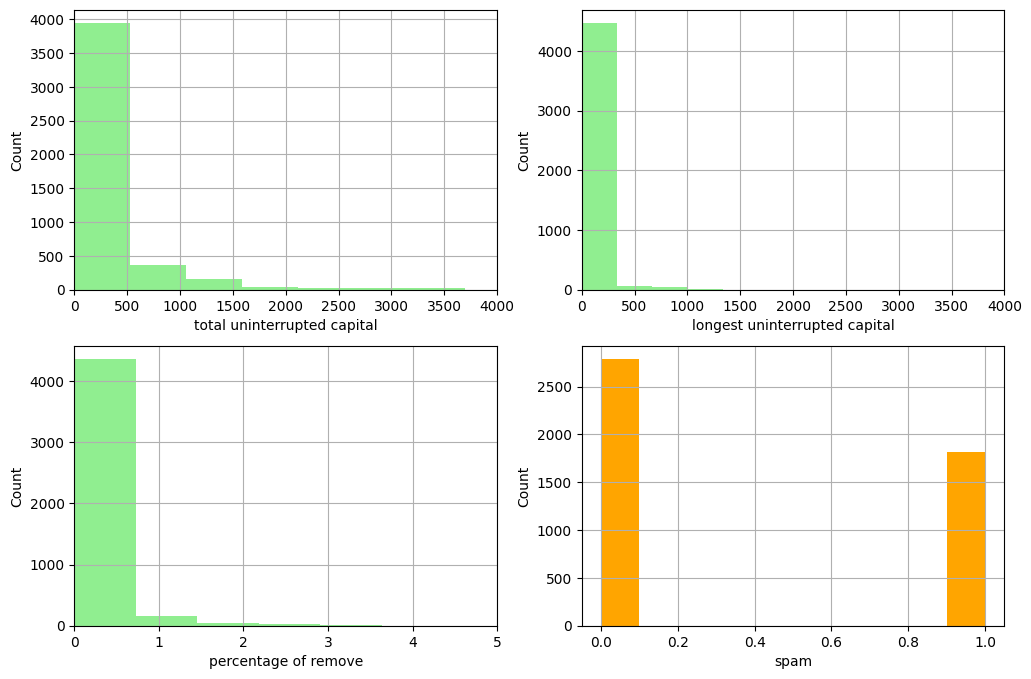

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("spam_dataset.csv")
display(df.head(6))

variables = ['capital_run_length_total:', 'capital_run_length_longest:', 'word_freq_remove:', 'spam']
var_names = ['total uninterrupted capital', 'longest uninterrupted capital', 'percentage of remove', 'spam']
plt.figure(figsize=(12, 8))
for i, name in enumerate(variables):
  plt.subplot(2, 2, i+1)
  if i == 3:
    df[name].hist(color = 'orange')
    plt.xlabel(var_names[i])
    plt.ylabel('Count')
  elif i == 2:
    df[name].hist(color = 'lightgreen')
    plt.xlim(0,5)
    plt.xlabel(var_names[i])
    plt.ylabel('Count')
  else:
    df[name].hist(color = 'lightgreen', bins = 30)
    plt.xlim(0,4000)
    plt.xlabel(var_names[i])
    plt.ylabel('Count')

### **2. Use Random Forest**
* Q: Choose one model from Part A Question 4. Split the data into training and test subsets. Build a model with the three variables in the dataset that you think will be good predictors of "spam". Run the model and evaluate prediction error using k-fold cross-validation. Describe why you chose any particular parameters for your model (e.g., if you used KNN how did you decide to choose a specific value for k).
* A: After running the GridSearchCV with 5-fold cross validation, I found the best hyperparameters are: 'max_depth'=10, 'n_estimators'=100. The performance under these parameters is that the average f1 score from 5-fold validation is 0.783 on the training set, while it is 0.759 on the test set. Considering max_depth=10 is in the middle of all values of param_grid and 'max_depth' is in the left end, means we might not need to test more scenarios like n_estimator is higher than 400, and so on, I chose these parameters for the final model. Moreover, prediction error could be indicated by the accuracy score, which is approximately 81%.

Best mean cross-validation score: 0.783
Best parameters: {'max_depth': 10, 'n_estimators': 100}
Test-set score with the best performed parameter: 0.759
accuracy score: 0.8123370981754996


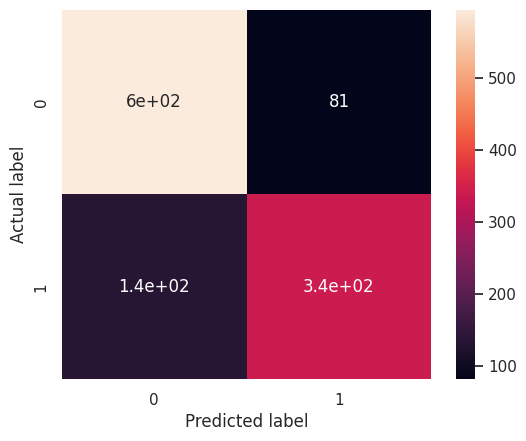

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from statistics import mean
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import accuracy_score

X = df[['capital_run_length_total:', 'capital_run_length_longest:', 'word_freq_remove:']]
y = df['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

param_grid = {
    'n_estimators':[100, 200, 300, 400],
    'max_depth':[None, 10, 20, 30]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
print("Best mean cross-validation score: {:.3f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

y_pred = grid_search.predict(X_test)

# Apply the test sets to the best performed parameter
print("Test-set score with the best performed parameter: {:.3f}".format(grid_search.score(X_test, y_test)))

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, square=True, annot=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(f"accuracy score: {accuracy_score(y_test, y_pred, normalize=True)}")

### **3. Use Logistic Regression**
* Q: Split the data into training and test subsets. Build a model with the three variables in the dataset that you think will be good predictors of "spam". Run the model and evaluate prediction error using k-fold cross-validation. Describe why you chose any particular parameters for your model (e.g., if you used KNN how did you decide to choose a specific value for k).
* A: After running the GridSearchCV with 5-fold cross validation, I found the best hyperparameter is: C = 50. The performance under this parameter is that the average f1 score on the training set is 0.664, while it is 0.630 on the test set. Considering that model performance is better when C = 50, rather than C = 10 and C = 100, I chose C = 50 as the final parameter. Moreover, prediction error could be indicated by the accuracy score, which is approximately 76%.

Best mean corss-validation score: 0.664
Best parameters: {'C': 50}
Test-set score with the best performed parameter: 0.630
accuracy score: 0.7619461337966985


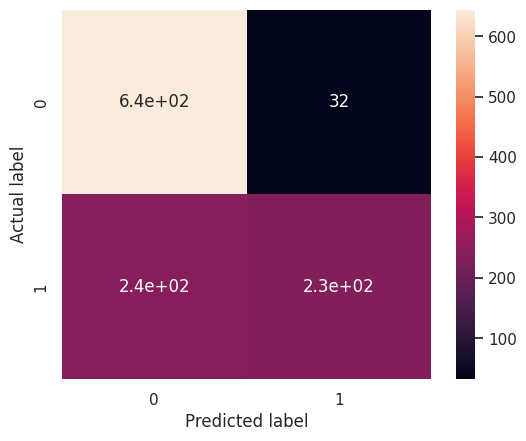

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'C':[10, 50, 100, 200, 300, 400]
}

grid_search_1 = GridSearchCV(LogisticRegression(penalty='l2'), param_grid=param_grid, cv=5, scoring='f1')
grid_search_1.fit(X_train_scaled, y_train)
print("Best mean corss-validation score: {:.3f}".format(grid_search_1.best_score_))
print("Best parameters: {}".format(grid_search_1.best_params_))
y_pred1 = grid_search_1.predict(X_test_scaled)
print("Test-set score with the best performed parameter: {:.3f}".format(grid_search_1.score(X_test_scaled, y_test)))

mat = confusion_matrix(y_test, y_pred1)
sns.heatmap(mat, square=True, annot=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(f"accuracy score: {accuracy_score(y_test, y_pred1, normalize=True)}")

### **4. Use Bagging Classification**
* Q: Split the data into training and test subsets. Build a model with the three variables in the dataset that you think will be good predictors of "spam". Run the model and evaluate prediction error using k-fold cross-validation. Describe why you chose any particular parameters for your model (e.g., if you used KNN how did you decide to choose a specific value for k).
* A: After running the GridSearchCV with 5-fold cross validation, I found the best hyperparameter is: 'n_estimators'= 50. The performance under this parameter is that the average f1 score on the training set is 0.771, while it is 0.781 on the test set. Considering that model performance is better when 'n_estimators' = 50, rather than 'n_estimators' = 10 and 'n_estimators' = 100, I chose 'n_estimators' = 50 as the final parameter. Moreover, prediction error could be indicated by the accuracy score, which is approximately 82%.

Best mean corss-validation score: 0.771
Best parameters: {'n_estimators': 50}
Test-set score with the best performed parameter: 0.781
accuracy score: 0.8192875760208514


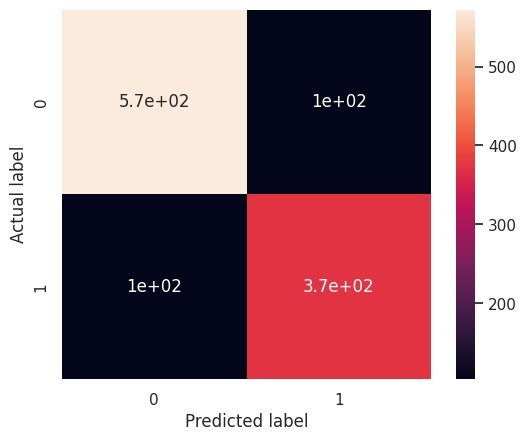

In [5]:
from sklearn.ensemble import BaggingClassifier

param_grid = {
    'n_estimators': [10, 50, 100, 200, 300, 400]
}

grid_search_2 = GridSearchCV(BaggingClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='f1')
grid_search_2.fit(X_train, y_train)
print("Best mean corss-validation score: {:.3f}".format(grid_search_2.best_score_))
print("Best parameters: {}".format(grid_search_2.best_params_))
print("Test-set score with the best performed parameter: {:.3f}".format(grid_search_2.score(X_test, y_test)))

y_pred2 = grid_search_2.predict(X_test)
mat = confusion_matrix(y_test, y_pred2)
sns.heatmap(mat, square=True, annot=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(f"accuracy score: {accuracy_score(y_test, y_pred2, normalize=True)}")

### **5. Use Support Vector Machines**
* Q: Split the data into training and test subsets. Build a model with the three variables in the dataset that you think will be good predictors of "spam". Run the model and evaluate prediction error using k-fold cross-validation. Describe why you chose any particular parameters for your model (e.g., if you used KNN how did you decide to choose a specific value for k).
* A: After running the GridSearchCV with 5-fold cross validation, I found the best hyperparameters are: C = 50, gamma = 0.1. The performance under these parameters is that the average f1 score on the training set is 0.718, while it is 0.712 on the test set. Considering that 'C' = 50 and gamma = 0.1 lies within the range of all values of param_gid, I chose 'C' = 50 and 'gamma' = 0.1 as the final parameter. Moreover, prediction error could be indicated by the accuracy score, which is approximately 75%.

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best mean cross-validation score: 0.718
Best parameters: {'C': 50, 'gamma': 0.1}
Test-score with the best performed parameter: 0.712
accuracy score: 0.7541268462206777


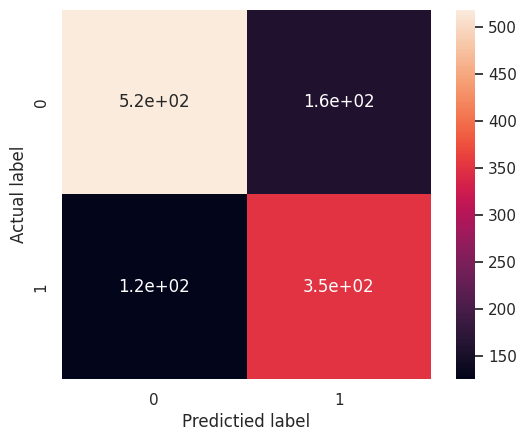

In [6]:
from sklearn.svm import SVC
param_grid = {
    'C':[10, 50, 100, 200],
    'gamma':[0.0001, 0.001, 0.01, 0.1, 1]
}

grid_search_3 = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=5, scoring='f1')
grid_search_3.fit(X_train, y_train)
print("Best mean cross-validation score: {:.3f}".format(grid_search_3.best_score_))
print("Best parameters: {}".format(grid_search_3.best_params_))
print("Test-score with the best performed parameter: {:.3f}".format(grid_search_3.score(X_test, y_test)))

y_pred3 = grid_search_3.predict(X_test)
mat = confusion_matrix(y_test, y_pred3)
# square=True, making a square chart; annot=True, presenting the value in each subsquare
sns.heatmap(mat, square=True, annot=True)
plt.ylabel('Actual label')
plt.xlabel('Predictied label')
print(f"accuracy score: {accuracy_score(y_test, y_pred3, normalize=True)}")

### **6. Rerun all models with 3 additional variables**
* **Rerun all 4 models with 3 additional variables that you think will help the prediction accuracy. Did this cause the performance to improve over your previous models?**
* I added the following variables: 'word_freq_our:', 'char_freq_$:', 'word_freq_receive:'. The reason for this is that they also changed in the scale in different situations, when spam equals either 0 or 1.

* Comparison of Random Forest:
 * Before(y_test score): 0.759
 * After(y_test score): 0.848
 * Before(accuracy score): 81%
 * After(accuracy score): 88%

* Comparison of Logistic Regression:
 * Before(y_test score): 0.630
 * After(y_test score): 0.786
 * Before(accuracy score): 76%
 * After(accuracy score): 85%

* Comparison of Bagging Classification:
 * Before(y_test score): 0.781
 * After(y_test score): 0.846
 * Before(accuracy score): 82%
 * After(accuracy score): 87%

* Comparison of SVM:
 * Before(y_test score): 0.712
 * After(y_test score): 0.755
 * Before(accuracy score): 75%
 * After(accuracy score): 81%

* As a result, we can observe that the performance of all models was improved after incorporating more independent variables. Among them, Random Forest, Logistic Regression and Bagging Classification showed relatively higher improvement compared to the SVM model.

Best mean cross-validation score for Random Forest: 0.848
Best parameters for Random Forest: {'rf__max_depth': 20, 'rf__n_estimators': 300}
Test-set score with the best performed parameter for Random Forest: 0.848
Best mean cross-validation score for Logistic Regression: 0.775
Best parameters for Logistic Regression: {'lr__C': 10}
Test-set score with the best performed parameter for Logistic Regression: 0.786
Best mean cross-validation score for Bagging Classification: 0.839
Best parameters for Bagging Classification: {'bc__n_estimators': 400}
Test-set score with the best performed parameter for Bagging Classification: 0.846
Best mean cross-validation score for Support Vector Machines: 0.754
Best parameters for Support Vector Machines: {'svc__C': 200, 'svc__gamma': 0.001}
Test-set score with the best performed parameter for Support Vector Machines: 0.755
accuracy score of RF: 0.8774978279756733
accuracy score of LR: 0.845351867940921
accuracy score of BC: 0.8748913987836664
accuracy sc

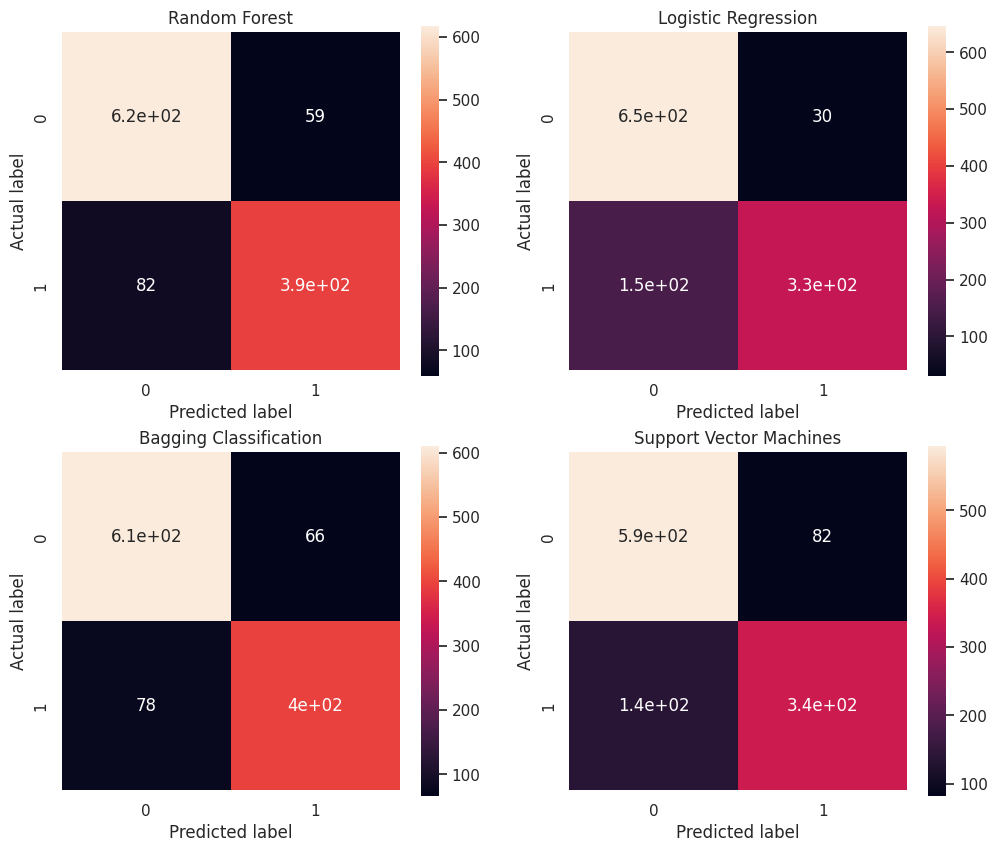

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X = df[['capital_run_length_total:', 'capital_run_length_longest:', 'word_freq_remove:', 'word_freq_our:', 'char_freq_$:', 'word_freq_receive:']]
y = df['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

param_grid = {
    'RandomForest':{'rf__n_estimators':[100, 200, 300, 400], 'rf__max_depth':[None, 10, 20, 30]},
    'LogisticRegression':{'lr__C':[10, 50, 100, 200, 300, 400]},
    'BaggingClassifier':{'bc__n_estimators': [10, 50, 100, 200, 300, 400]},
    'SVC':{'svc__C':[10, 50, 100, 200],'svc__gamma':[0.0001, 0.001, 0.01, 0.1, 1]}
}

pipelines = {
    'RF': Pipeline([('rf', RandomForestClassifier(random_state=42))]),
    'LR': Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(penalty='l2'))]),
    'BC': Pipeline([('bc', BaggingClassifier(random_state=42))]),
    'SVC': Pipeline([('svc', SVC(kernel='rbf'))])
}

grid_search_RF = GridSearchCV(pipelines['RF'], param_grid=param_grid['RandomForest'], cv=5, scoring='f1')
grid_search_RF.fit(X_train, y_train)

grid_search_LR = GridSearchCV(pipelines['LR'], param_grid=param_grid['LogisticRegression'], cv=5, scoring='f1')
grid_search_LR.fit(X_train, y_train)

grid_search_BC = GridSearchCV(pipelines['BC'], param_grid=param_grid['BaggingClassifier'], cv=5, scoring='f1')
grid_search_BC.fit(X_train, y_train)

grid_search_SVC = GridSearchCV(pipelines['SVC'], param_grid=param_grid['SVC'], cv=5, scoring='f1')
grid_search_SVC.fit(X_train, y_train)

print("Best mean cross-validation score for Random Forest: {:.3f}".format(grid_search_RF.best_score_))
print("Best parameters for Random Forest: {}".format(grid_search_RF.best_params_))
print("Test-set score with the best performed parameter for Random Forest: {:.3f}".format(grid_search_RF.score(X_test, y_test)))

print("Best mean cross-validation score for Logistic Regression: {:.3f}".format(grid_search_LR.best_score_))
print("Best parameters for Logistic Regression: {}".format(grid_search_LR.best_params_))
print("Test-set score with the best performed parameter for Logistic Regression: {:.3f}".format(grid_search_LR.score(X_test, y_test)))

print("Best mean cross-validation score for Bagging Classification: {:.3f}".format(grid_search_BC.best_score_))
print("Best parameters for Bagging Classification: {}".format(grid_search_BC.best_params_))
print("Test-set score with the best performed parameter for Bagging Classification: {:.3f}".format(grid_search_BC.score(X_test, y_test)))

print("Best mean cross-validation score for Support Vector Machines: {:.3f}".format(grid_search_SVC.best_score_))
print("Best parameters for Support Vector Machines: {}".format(grid_search_SVC.best_params_))
print("Test-set score with the best performed parameter for Support Vector Machines: {:.3f}".format(grid_search_SVC.score(X_test, y_test)))

y_pred_RF = grid_search_RF.predict(X_test)
y_pred_LR = grid_search_LR.predict(X_test)
y_pred_BC = grid_search_BC.predict(X_test)
y_pred_SVC = grid_search_SVC.predict(X_test)

# fig: represent the whole picture
# axs: represent the 2 dimentional array (2, 2). like axs[1, 0] means row2, column1
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

ma_RF = confusion_matrix(y_test, y_pred_RF)
mat_LR = confusion_matrix(y_test, y_pred_LR)
mat_BC = confusion_matrix(y_test, y_pred_BC)
mat_SVC = confusion_matrix(y_test, y_pred_SVC)

sns.heatmap(ma_RF, ax=axs[0,0], square=True, annot=True)
axs[0,0].set_title('Random Forest')
axs[0,0].set_ylabel('Actual label')
axs[0,0].set_xlabel('Predicted label')

sns.heatmap(mat_LR, ax=axs[0,1], square=True, annot=True)
axs[0,1].set_title('Logistic Regression')
axs[0,1].set_ylabel('Actual label')
axs[0,1].set_xlabel('Predicted label')

sns.heatmap(mat_BC, ax=axs[1,0], square=True, annot=True)
axs[1,0].set_title('Bagging Classification')
axs[1,0].set_ylabel('Actual label')
axs[1,0].set_xlabel('Predicted label')

sns.heatmap(mat_SVC, ax=axs[1,1], square=True, annot=True)
axs[1,1].set_title('Support Vector Machines')
axs[1,1].set_ylabel('Actual label')
axs[1,1].set_xlabel('Predicted label')

print(f"accuracy score of RF: {accuracy_score(y_test, y_pred_RF, normalize=True)}")
print(f"accuracy score of LR: {accuracy_score(y_test, y_pred_LR, normalize=True)}")
print(f"accuracy score of BC: {accuracy_score(y_test, y_pred_BC, normalize=True)}")
print(f"accuracy score of SVC: {accuracy_score(y_test, y_pred_SVC, normalize=True)}")

### **7. Other Variables?**
* **What is a variable that isn't available in this dataset but you think could increase your final model's predictive power if you had it? Why do you think it would improve your model?**

* A: I believe a lot of spam messages include the URL. During my intership of managing the TikTok's Content Risk, I found bad actors usually use goole forms or other third-party platforms to disguise their true websites. A lot of them are tiny url. As a result, the proportion and the number of tiny url in a message might be a good predictor. Moreover, I guess that bad actors hope the recipient to click on their link as promptly as possible. These variables might show a comparatively strong difference between spam=1 and 0 situations, which might be conducive for the model to differentiate the spam messages. Therefore, I think the proportion of the words like "now" and "quick" can also be helpful for our judgement.